## Imports

In [115]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from ipynb.fs.full.JO_ML_model import drop_0s, k_fold_cv, z_score_outliers
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Combined Nigeria and Ethiopia Baseline ML Model

## Preliminary Analysis and Baseline Model

In [17]:
# Preprocessed dataframe which clusters all households within 
# a nightlight cluster and takes the mean of their per capita 
# consumption (adjusted for ppp by country (Ethiopia and Nigeria (both 2015)))
data = pd.read_csv("../raw_data/nig_eth.csv",sep=',')

In [18]:
data.head()

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,3.455701,39.515994,14.854634,0.0
1,eth,3.549937,39.184234,14.312022,0.0
2,eth,3.864243,39.101366,12.470145,0.0
3,eth,3.982931,38.491368,8.336539,0.0
4,eth,4.048194,41.930928,4.762526,0.0


In [19]:
data.dtypes

country         object
cluster_lat    float64
cluster_lon    float64
cons_pc        float64
nightlights    float64
dtype: object

In [20]:
data.isna().sum()

country        0
cluster_lat    0
cluster_lon    0
cons_pc        0
nightlights    0
dtype: int64

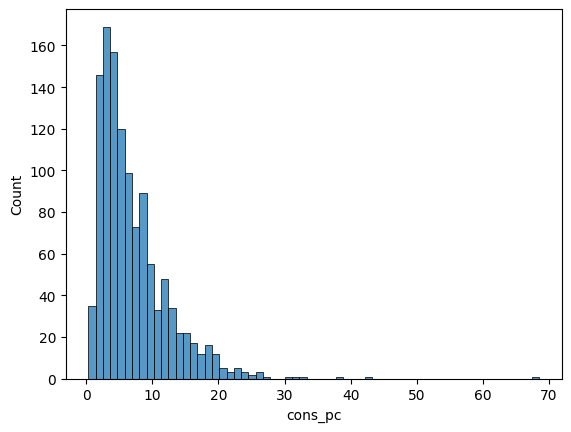

In [22]:
sns.histplot(data.cons_pc);

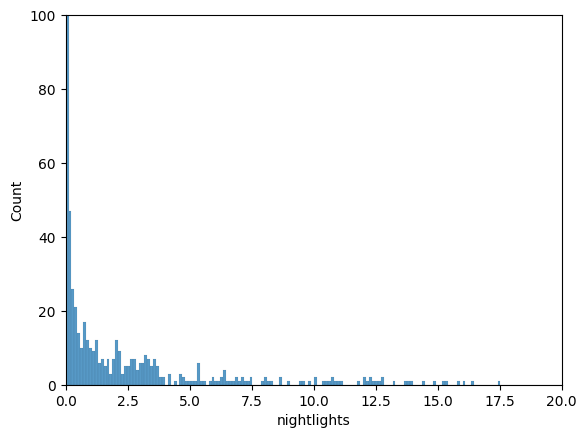

In [62]:
sns.histplot(data.nightlights)
plt.xlim(0,20)
plt.ylim(0,100);

In [51]:
corr_matrix = data[['cons_pc','nightlights']].corr()

<Axes: >

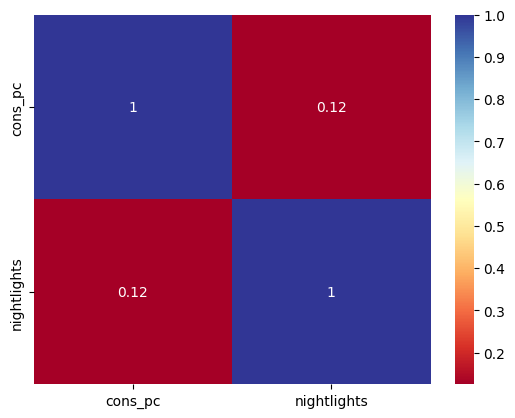

In [52]:
sns.heatmap(corr_matrix,annot=True,cmap='RdYlBu')

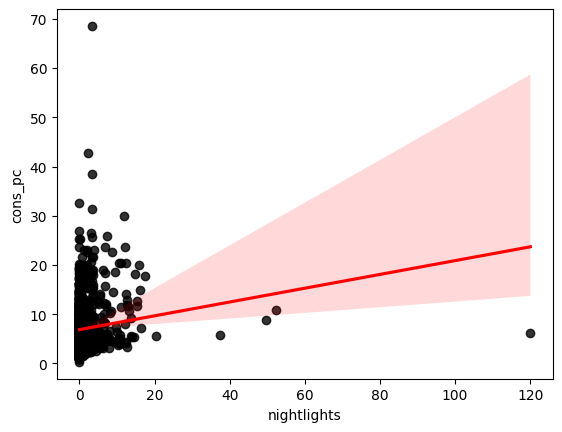

In [54]:
sns.regplot(x=data.nightlights,y=data.cons_pc,scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [31]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data[['nightlights']]))
X.rename(columns={0:'nightlights'},inplace=True)
y = data['cons_pc']

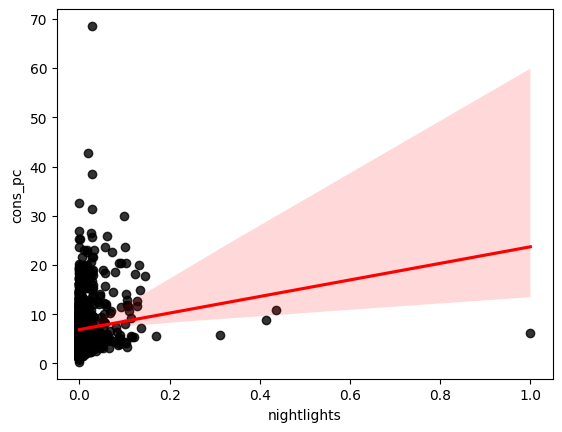

In [55]:
sns.regplot(x=X,y=y,scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [66]:
# Re-run a rough cross validation
model = LinearRegression()

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(r2_score))

In [67]:
scores.mean()

-0.042655383747878285

In [116]:
cons_pc_outliers = z_score_outliers(data.cons_pc)

In [117]:
cons_pc_outliers

array([ 30,  82,  87,  88,  89, 181, 210, 226, 411, 473, 555, 611, 711,
       737, 880])

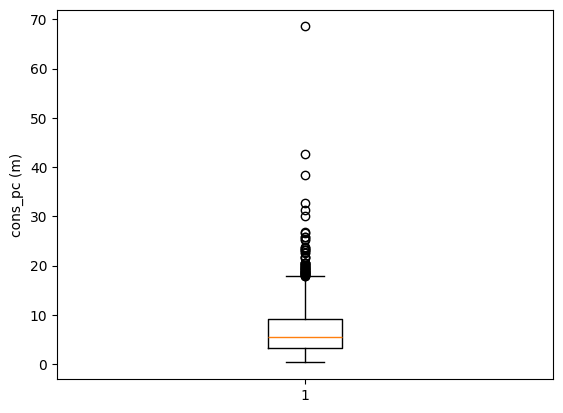

In [37]:
# create a boxplot of outliers to visualise the distribution
plt.boxplot(data['cons_pc'])
plt.ylabel('cons_pc (m)');

In [38]:
nl_outliers = z_score_outliers(data.nightlights)

In [39]:
nl_outliers

array([ 216,  219,  525,  526,  595,  630,  723, 1126])

In [45]:
# drop cons_pc and nighltights z-score outliers
data_less_ol = data.drop(list(cons_pc_outliers)).drop(list(nl_outliers)).reset_index(drop=True)

In [46]:
data_less_ol

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,eth,3.455701,39.515994,14.854634,0.000000
1,eth,3.549937,39.184234,14.312022,0.000000
2,eth,3.864243,39.101366,12.470145,0.000000
3,eth,3.982931,38.491368,8.336539,0.000000
4,eth,4.048194,41.930928,4.762526,0.000000
...,...,...,...,...,...
1159,ng,13.202805,7.721468,1.165778,0.000777
1160,ng,13.339897,5.214480,2.710443,0.003922
1161,ng,13.555542,6.246647,1.759571,0.000000
1162,ng,13.604251,5.741676,1.647506,0.000000


In [49]:
corr_matrix_ol = data_less_ol[['cons_pc','nightlights']].corr()

In [50]:
corr_matrix_ol

,cons_pc,nightlights
cons_pc,1.000000,0.206441
nightlights,0.206441,1.000000


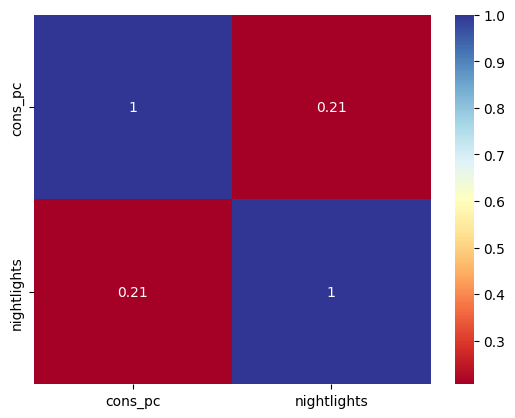

In [70]:
sns.heatmap(corr_matrix_ol,annot=True,cmap='RdYlBu');

In [72]:
X_ol = pd.DataFrame(scaler.fit_transform(data_less_ol[['nightlights']]))
X_ol.rename(columns={0:'nightlights'},inplace=True)
y_ol = data_less_ol['cons_pc']

In [73]:
# Re-run a rough cross validation
model_ol = LinearRegression()

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model_ol, X_ol, y_ol, cv=kf, scoring=make_scorer(r2_score))

In [74]:
scores.mean()

0.02774423568029033

In [78]:
data_0s_ol = drop_0s(data_less_ol)

In [79]:
len(data_0s_ol)

848

In [88]:
# extract z-score outlier indices after 0s have been dropped
more_ol = np.union1d(z_score_outliers(data_0s_ol['cons_pc']),z_score_outliers(data_0s_ol['nightlights']))

In [90]:
z_score_outliers(data_0s_ol['cons_pc'])

array([ 49, 189, 367, 500, 583, 644, 658, 719])

In [91]:
z_score_outliers(data_0s_ol['nightlights'])

array([ 23,  40,  63,  73,  88,  92, 101, 150, 153, 198, 229, 264, 292,
       307, 332, 382, 388, 419, 459, 491, 525, 550, 626, 631, 670, 727,
       766, 788, 800, 831, 837])

In [89]:
more_ol

array([ 23,  40,  49,  63,  73,  88,  92, 101, 150, 153, 189, 198, 229,
       264, 292, 307, 332, 367, 382, 388, 419, 459, 491, 500, 525, 550,
       583, 626, 631, 644, 658, 670, 719, 727, 766, 788, 800, 831, 837])

In [94]:
# drop cons_pc and nighltights z-score outliers
data_0s_ol2 = data_0s_ol.drop(list(more_ol)).reset_index(drop=True)

In [95]:
data_0s_ol2

,country,cluster_lat,cluster_lon,cons_pc,nightlights
0,ng,6.149701,6.790889,4.668680,3.216414
1,ng,5.090373,7.366208,6.191946,2.651795
2,eth,12.375944,39.005785,5.314735,0.020699
3,ng,9.083250,9.875452,1.050271,0.000000
4,eth,8.454509,36.348500,14.813382,0.080461
...,...,...,...,...,...
804,eth,11.842197,39.604607,7.822815,0.276987
805,ng,8.149853,4.717822,2.847590,0.555495
806,eth,9.612571,39.783043,6.142461,0.006398
807,eth,5.525706,38.762067,7.369724,0.000457


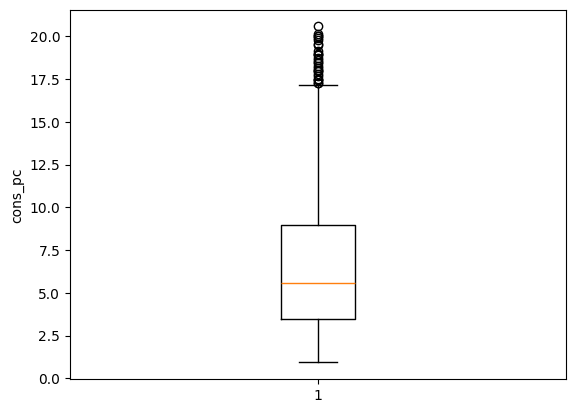

In [97]:
# visualise outliers
plt.boxplot(data_0s_ol2['cons_pc'])
plt.ylabel('cons_pc');

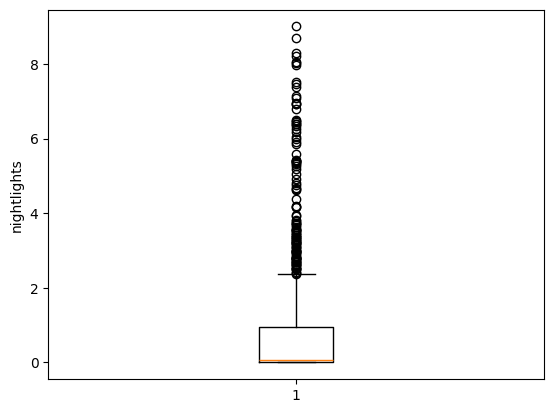

In [98]:
plt.boxplot(data_0s_ol2['nightlights'])
plt.ylabel('nightlights');

In [99]:
X_0s_ol2 = pd.DataFrame(scaler.fit_transform(data_0s_ol2[['nightlights']]))
X_0s_ol2.rename(columns={0:'nightlights'},inplace=True)
y_0s_ol2 = data_0s_ol2['cons_pc']

In [100]:
corr_matrix_ol_0s = data_0s_ol2[['cons_pc','nightlights']].corr()

In [101]:
corr_matrix_ol_0s

,cons_pc,nightlights
cons_pc,1.000000,0.159615
nightlights,0.159615,1.000000


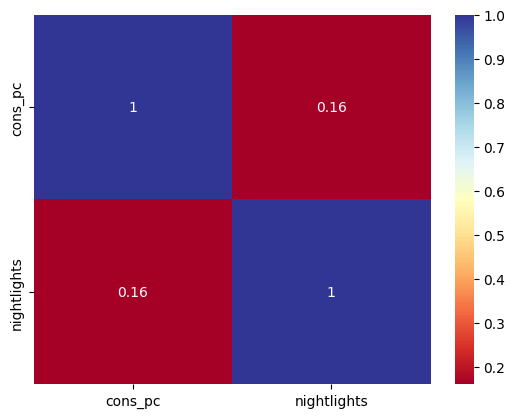

In [102]:
sns.heatmap(corr_matrix_ol_0s,annot=True,cmap='RdYlBu');

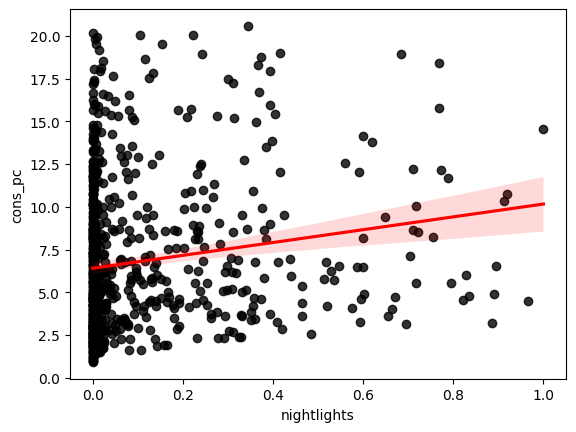

In [105]:
# visualise the regression after the zeros have been dropped
sns.regplot(X_0s_ol2,x=X_0s_ol2,y=y_0s_ol2,scatter_kws={"color": "black"}, line_kws={"color": "red"});


In [107]:
# Re-run a rough cross validation
model_ol_0s = LinearRegression()

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True)

# Perform cross-validation
scores = cross_val_score(model_ol_0s, X_0s_ol2,y_0s_ol2, cv=kf, scoring=make_scorer(r2_score))

In [108]:
scores.mean()

-0.00534643852050406

In [114]:
k_fold_cv(data_0s_ol2)

-0.00586242522518946
0.07213628515874794
